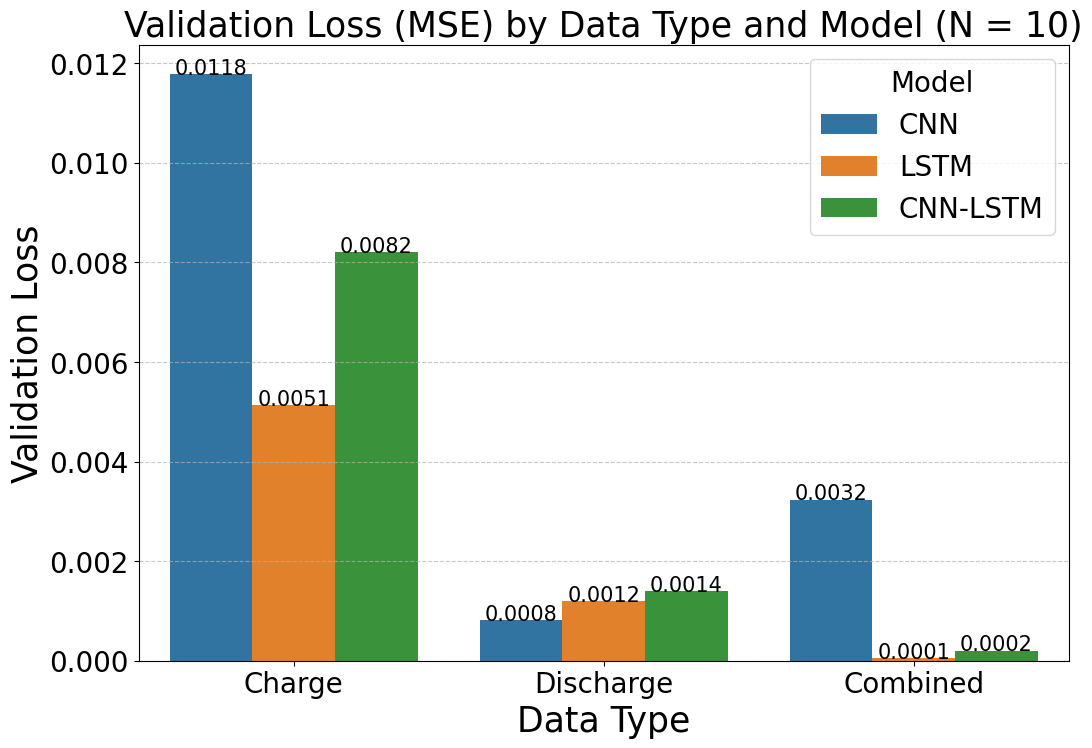

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your table
data = {
    'Data Type': ['Charge', 'Discharge', 'Combined'],
    'CNN': [0.01178, 0.00081, 0.00323],  # Validation Loss values
    'LSTM': [0.00513, 0.00119, 0.0000554],
    'CNN-LSTM': [0.0082, 0.0014, 0.0002]
}

df = pd.DataFrame(data)

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars="Data Type", var_name="Model", value_name="Validation Loss")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Data Type', y='Validation Loss', hue='Model', data=df_melted)

# Add values on top of the bars, excluding the "0.0000" in the Charge section
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0.0000 or p.get_x() > 0.5:  # Exclude only the Charge's 0.0000
        plt.gca().annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='baseline', fontsize=15)

# Grid and other plot customizations
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.title('Validation Loss (MSE) by Data Type and Model (N = 10)', fontsize=25)
plt.xlabel('Data Type', fontsize=25)
plt.ylabel('Validation Loss', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Model', fontsize=20, title_fontsize=20)

# Define the directory path
directory = "15. Results"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the plot as a PDF file
plt.savefig(os.path.join(directory, "Data_type_validation_loss.pdf"))

# Show the plot
plt.show()


Average performance of combined and discharge across the different models is almost equivalent, hence the snr is taken into account. The models showing a higher snr is the better performing, which in this case is the combined dataset. 

along with other 

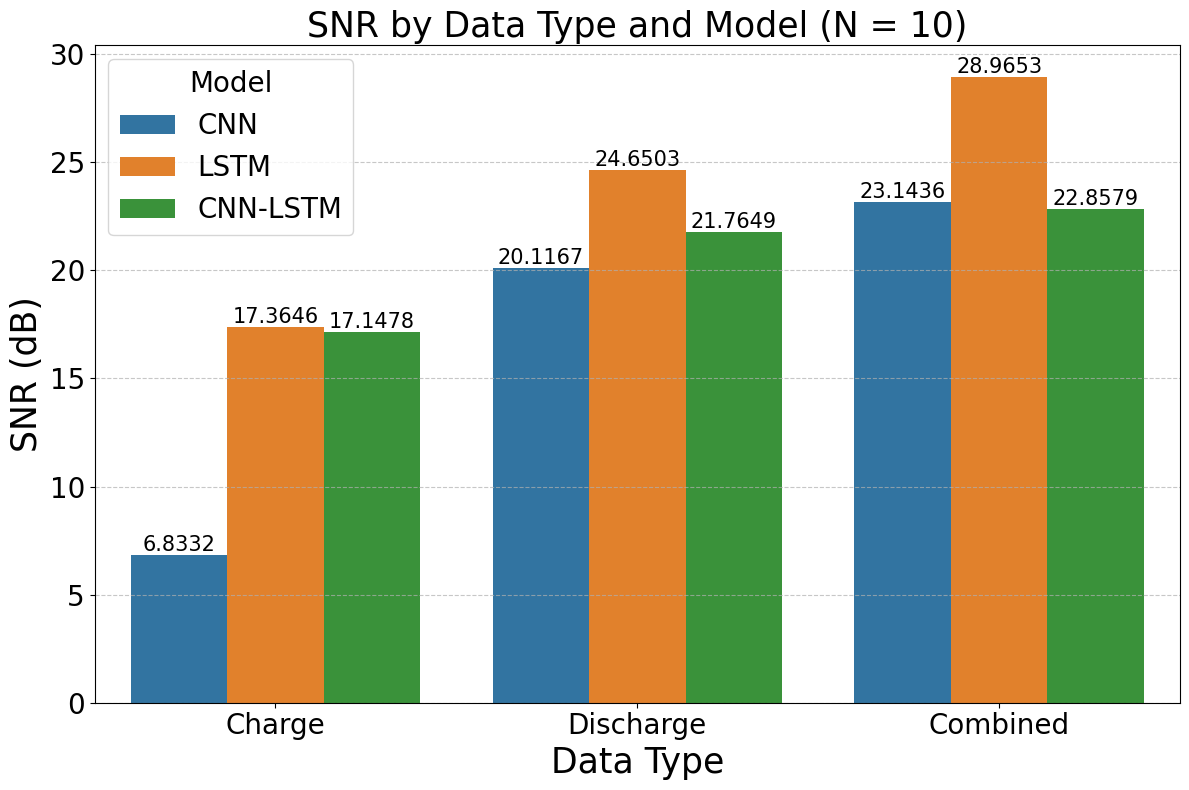

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your table
data = {
    'Data Type': ['Charge', 'Discharge', 'Combined'],
    'CNN': [6.8332, 20.1167, 23.1436],  # SNR values
    'LSTM': [17.3646, 24.6503, 28.9653],
    'CNN-LSTM': [17.1478, 21.7649, 22.8579]
}

df = pd.DataFrame(data)

# Melt the dataframe for easier plotting
df_melted = df.melt(id_vars="Data Type", var_name="Model", value_name="SNR (dB)")

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Data Type', y='SNR (dB)', hue='Model', data=df_melted)

# Add annotations on top of the bars
for p in bar_plot.patches:
    height = p.get_height()
    # Retrieve the Data Type and Model associated with each bar
    x_value = p.get_x() + p.get_width() / 2
    y_value = height
    # Calculate the index of the current bar
    index = int(p.get_x() + p.get_width() / 2 - 0.2)  # Adjusted for bar width
    data_type = df_melted['Data Type'][index]
    model = df_melted['Model'][index]
    
    # Conditional annotation: Skip annotating if the value is 0.0000 in 'Charge'
    if not (data_type == 'Charge' and abs(height) < 1e-4):
        bar_plot.annotate(f'{height:.4f}', (x_value, y_value),
                          ha='center', va='bottom', fontsize=15)

# Customize the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.title('SNR by Data Type and Model (N = 10)', fontsize=25)
plt.xlabel('Data Type', fontsize=25)
plt.ylabel('SNR (dB)', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Model', fontsize=20, title_fontsize=20)
plt.tight_layout()

plt.savefig(os.path.join(directory, "Data_type_snr.pdf"))

plt.show()


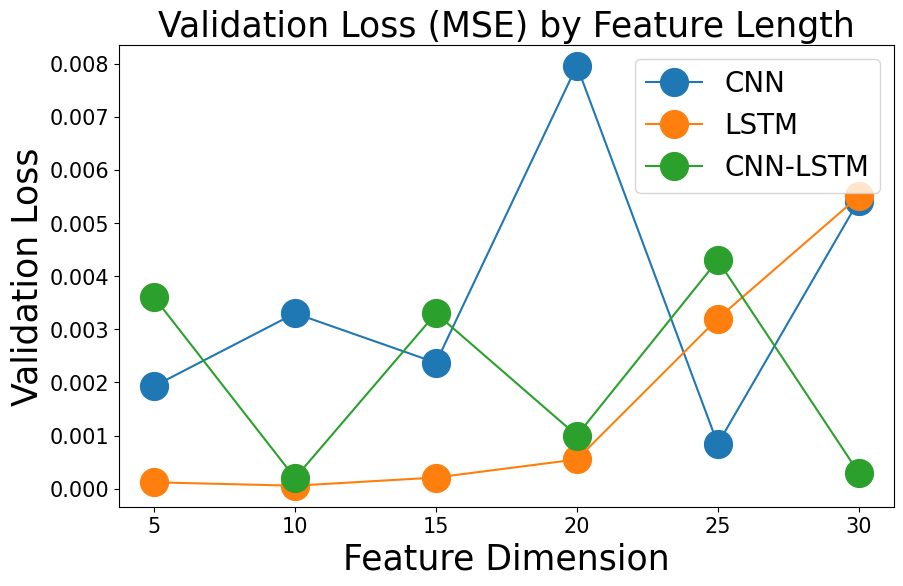

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# for b0005_combined_mm
# Data from your table
data = {
    'Feature Length': [5, 10, 15, 20, 25, 30],
    'CNN': [0.00193, 0.0033, 0.00237, 0.00796, 0.00084, 0.00542],  # Example: Validation Loss values
    'LSTM': [0.00012, 0.0000554, 0.00021, 0.00055, 0.0032, 0.0055],
    'CNN-LSTM': [0.0036, 0.0002, 0.0033, 0.001, 0.0043, 0.0003]
}

df = pd.DataFrame(data)

# Line plot
plt.figure(figsize=(10, 6))
for model in df.columns[1:]:
    plt.plot(df['Feature Length'], df[model], marker='o', label=model, markersize=20)  # Data point size set to 20

plt.title('Validation Loss (MSE) by Feature Length', fontsize=25)
plt.xlabel('Feature Dimension', fontsize=25)
plt.ylabel('Validation Loss', fontsize=25)

# Set x-axis ticks to specific points
plt.xticks([5, 10, 15, 20, 25, 30], fontsize=15)

# Customize y-axis tick font size
plt.yticks(fontsize=15)

# Customize legend
plt.legend(fontsize=20)

# Define the directory path
directory = "15. Results"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the plot as a PDF file
plt.savefig(os.path.join(directory, "Feature_dimension_line.pdf"))

# Show the plot
plt.show()


for cnn: n = 25
for lstm and cnn-lstm: n = 10

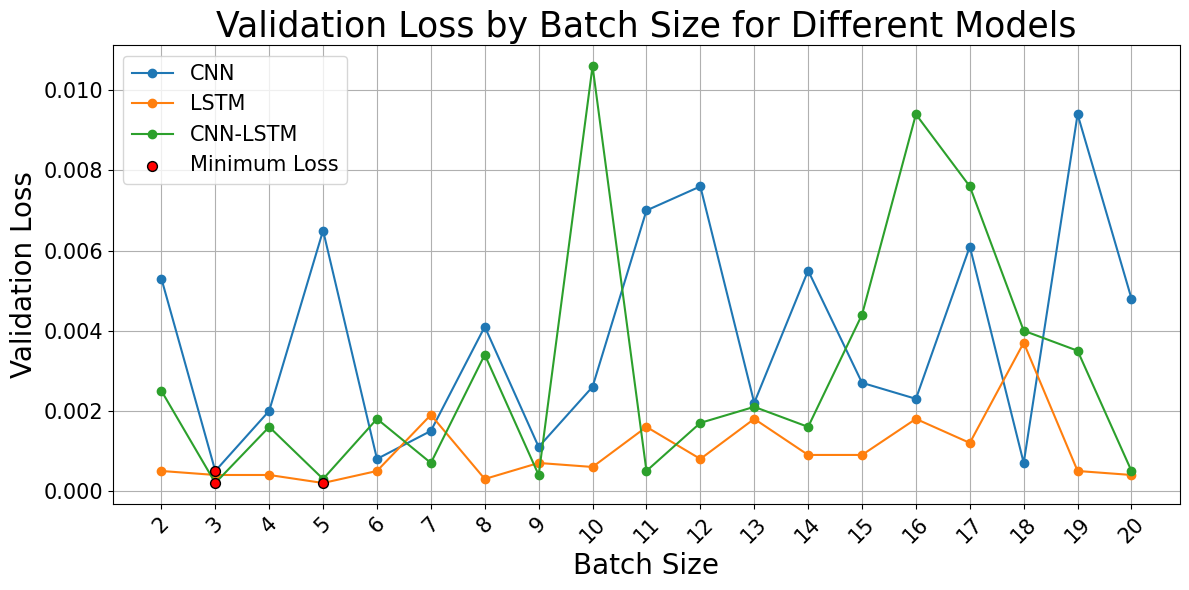

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Data with 'm =' removed from 'Batch Size'
data = {
    'Batch Size': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
    'CNN': [0.0053, 0.0005, 0.002, 0.0065, 0.0008, 0.0015, 0.0041, 0.0011, 0.0026, 0.007, 0.0076, 0.0022, 0.0055, 0.0027, 0.0023, 0.0061, 0.0007, 0.0094, 0.0048],
    'LSTM': [0.0005, 0.0004, 0.0004, 0.0002, 0.0005, 0.0019, 0.0003, 0.0007, 0.0006, 0.0016, 0.0008, 0.0018, 0.0009, 0.0009, 0.0018, 0.0012, 0.0037, 0.0005, 0.0004],
    'CNN-LSTM': [0.0025, 0.0002, 0.0016, 0.0003, 0.0018, 0.0007, 0.0034, 0.0004, 0.0106, 0.0005, 0.0017, 0.0021, 0.0016, 0.0044, 0.0094, 0.0076, 0.004, 0.0035, 0.0005]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Batch Size'], df['CNN'], marker='o', label='CNN')
plt.plot(df['Batch Size'], df['LSTM'], marker='o', label='LSTM')
plt.plot(df['Batch Size'], df['CNN-LSTM'], marker='o', label='CNN-LSTM')

# Highlight minimum points on each curve
for model in ['CNN', 'LSTM', 'CNN-LSTM']:
    min_idx = df[model].idxmin()
    plt.scatter(df['Batch Size'][min_idx], df[model][min_idx], color='red', edgecolor='black', s=50, zorder=5)

# Add a dummy scatter for the minimum loss legend entry
plt.scatter([], [], color='red', edgecolor='black', s=50, label='Minimum Loss')

plt.title('Validation Loss (MSE) by Batch Size for Different Models', fontsize=25)
plt.xlabel('Batch Size', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()

# Save and show plot
plt.savefig(os.path.join(directory, "Batch_size_validation_loss.pdf"))
plt.show()


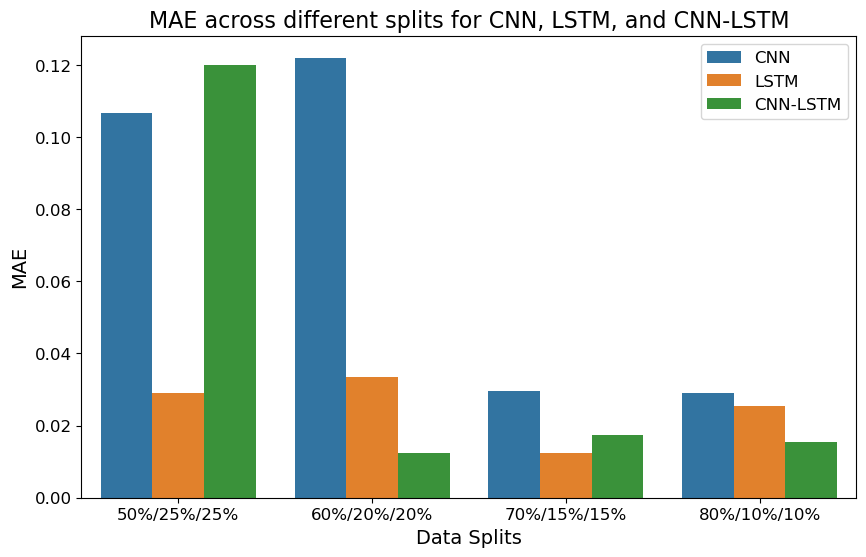

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
splits = ['50%/25%/25%', '60%/20%/20%', '70%/15%/15%', '80%/10%/10%']
cnn_mae = [0.1066, 0.1220, 0.0297, 0.0291]
lstm_mae = [0.0289, 0.0334, 0.0124, 0.0255]
cnn_lstm_mae = [0.1201, 0.0125, 0.0175, 0.0154]

# Create a DataFrame for easier plotting with Seaborn
data = {
    'Data Splits': splits * 3,  # Repeat splits for each model
    'MAE': cnn_mae + lstm_mae + cnn_lstm_mae,  # Combine all MAE values
    'Model': ['CNN'] * 4 + ['LSTM'] * 4 + ['CNN-LSTM'] * 4  # Model labels
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Data Splits', y='MAE', hue='Model', data=df)

# Labels and titles with fontsize
plt.xlabel('Data Splits', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('MAE across different splits for CNN, LSTM, and CNN-LSTM', fontsize=16)

# Legend with fontsize
plt.legend(fontsize=12)

# Show plot
plt.show()


In [49]:
import matplotlib.pyplot as plt
import os

def plot_tensors(tensor1, tensor2, tensor3, tensor4, labels=["Tensor 1", "Tensor 2", "Tensor 3", "Tensor 4"], title="Tensor Comparison Plot", file_name="", ylabel="Value", save_dir=None):
    """
    Plots four given tensors for comparison and saves the plot as a PDF if a save directory is provided.
    
    Parameters:
    tensor1 (torch.Tensor): The first tensor to plot.
    tensor2 (torch.Tensor): The second tensor to plot.
    tensor3 (torch.Tensor): The third tensor to plot.
    tensor4 (torch.Tensor): The fourth tensor to plot.
    labels (list of str): The labels for the tensors. Default is ["Tensor 1", "Tensor 2", "Tensor 3", "Tensor 4"].
    title (str): The title of the plot. Default is "Tensor Comparison Plot".
    ylabel (str): The label for the y-axis. Default is "Value".
    save_dir (str): Directory to save the plot as a PDF. Default is None (does not save).
    """
    # Convert the tensors to NumPy arrays
    # tensor1_np = tensor1.numpy()
    # tensor2_np = tensor2.numpy()
    # tensor3_np = tensor3.numpy()
    # tensor4_np = tensor4.numpy()

    # Create a figure and axis with a specified size
    fig, ax = plt.subplots(figsize=(12, 7))  # Adjust the width and height as needed

    # Plot the tensors
    ax.plot(tensor1, label=labels[0], linewidth=2.5)
    ax.plot(tensor2, label=labels[1], linewidth=2.5, color='#A52A2A')
    ax.plot(tensor3, label=labels[2], linewidth=2.5, color='#2ca02c')
    ax.plot(tensor4, label=labels[3], linewidth=2.5, color='#FF6347')

    # Set the title and labels with the specified font sizes
    ax.set_title(title, fontsize=28)
    ax.set_xlabel("Cycle", fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)

    # Add a legend
    ax.legend(fontsize=20)  # Adjust the legend font size if needed
    ax.grid(True, linestyle='--', which='both', axis='both', color='gray', alpha=0.5)
    
    # Set x-axis limits from 0 to the length of the tensor
    ax.set_xlim(0, len(tensor1))
    
    # Set the font size for the x and y axis datapoints
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # Save the plot as a PDF file if a save directory is provided
    if save_dir:
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, f"{file_name}.pdf"), format='pdf')
    
    # Show the plot
    plt.show()


LOAD SOH DATA TENSORS

In [57]:
import torch
import os

# Define the directory where the tensors are stored
load_dir = "15. Results"

# Load each tensor
b0005_soh_target = torch.load(os.path.join(load_dir, 'b0005_soh_target.pt'))
b0006_soh_target = torch.load(os.path.join(load_dir, 'b0006_soh_target.pt'))
b0007_soh_target = torch.load(os.path.join(load_dir, 'b0007_soh_target.pt'))

b0005_soh_predicted_cnn = torch.load(os.path.join(load_dir, 'b0005_soh_predicted_cnn.pt'))
b0006_soh_predicted_cnn = torch.load(os.path.join(load_dir, 'b0006_soh_predicted_cnn.pt'))
b0007_soh_predicted_cnn = torch.load(os.path.join(load_dir, 'b0007_soh_predicted_cnn.pt'))

b0005_soh_predicted_lstm = torch.load(os.path.join(load_dir, 'b0005_soh_predicted_lstm.pt'))
b0006_soh_predicted_lstm = torch.load(os.path.join(load_dir, 'b0006_soh_predicted_lstm.pt'))
b0007_soh_predicted_lstm = torch.load(os.path.join(load_dir, 'b0007_soh_predicted_lstm.pt'))

b0005_soh_predicted_cnnlstm = torch.load(os.path.join(load_dir, 'b0005_soh_predicted_cnnlstm.pt'))
b0006_soh_predicted_cnnlstm = torch.load(os.path.join(load_dir, 'b0006_soh_predicted_cnnlstm.pt'))
b0007_soh_predicted_cnnlstm = torch.load(os.path.join(load_dir, 'b0007_soh_predicted_cnnlstm.pt'))

print("Tensors have been loaded successfully.")


Tensors have been loaded successfully.


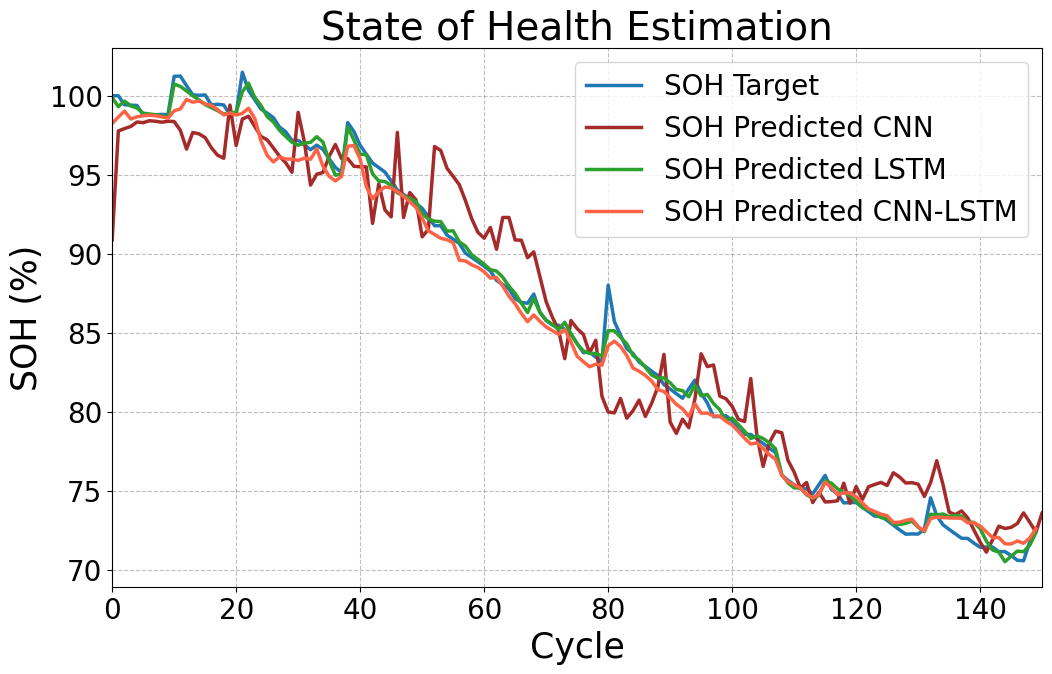

In [58]:
plot_tensors(b0005_soh_target, b0005_soh_predicted_cnn, b0005_soh_predicted_lstm, b0005_soh_predicted_cnnlstm,
                 labels=["SOH Target", "SOH Predicted CNN", "SOH Predicted LSTM", "SOH Predicted CNN-LSTM"],
                 title="State of Health Estimation", file_name="B0005_SOH_ALL", ylabel="SOH (%)", save_dir="15. Results")

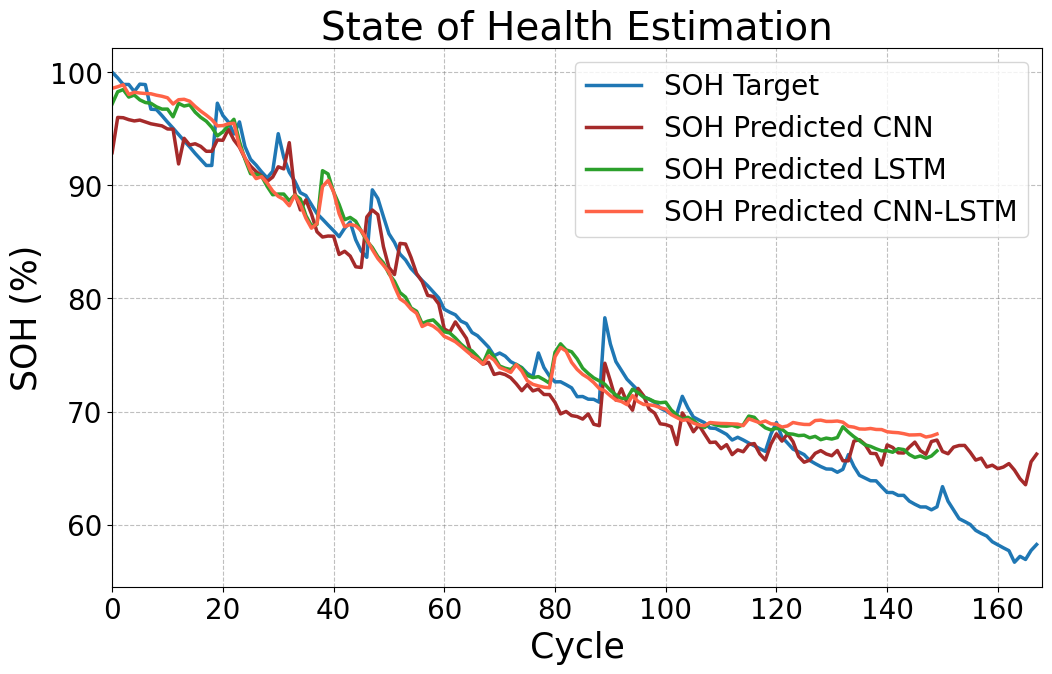

In [59]:
plot_tensors(b0006_soh_target, b0006_soh_predicted_cnn, b0006_soh_predicted_lstm, b0006_soh_predicted_cnnlstm,
                 labels=["SOH Target", "SOH Predicted CNN", "SOH Predicted LSTM", "SOH Predicted CNN-LSTM"],
                 title="State of Health Estimation", file_name="B0006_SOH_ALL", ylabel="SOH (%)", save_dir="15. Results")

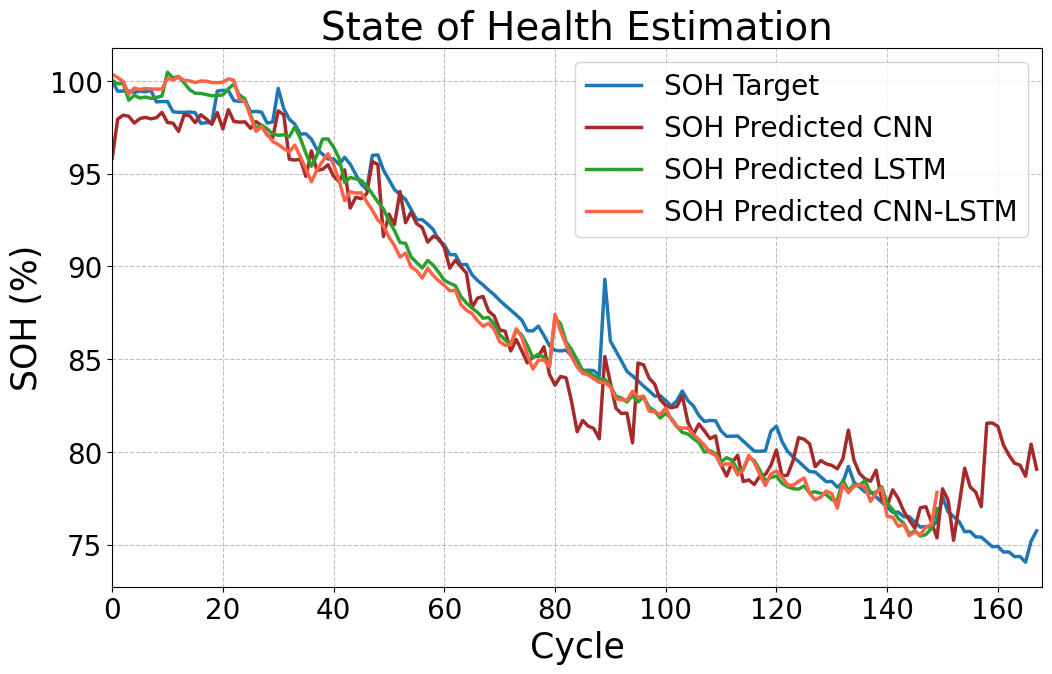

In [60]:
plot_tensors(b0007_soh_target, b0007_soh_predicted_cnn, b0007_soh_predicted_lstm, b0007_soh_predicted_cnnlstm,
                 labels=["SOH Target", "SOH Predicted CNN", "SOH Predicted LSTM", "SOH Predicted CNN-LSTM"],
                 title="State of Health Estimation", file_name="B0007_SOH_ALL", ylabel="SOH (%)", save_dir="15. Results")